# Import the libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Read the data 

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv')
data

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
995,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
996,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
997,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [3]:
data.columns.tolist()

['328',
 '48',
 '521585',
 '17-10-2014',
 'OH',
 '250/500',
 '1000',
 '1406.91',
 '0',
 '466132',
 'MALE',
 'MD',
 'craft-repair',
 'sleeping',
 'husband',
 '53300',
 '0.1',
 '25-01-2015',
 'Single Vehicle Collision',
 'Side Collision',
 'Major Damage',
 'Police',
 'SC',
 'Columbus',
 '9935 4th Drive',
 '5',
 '1',
 'YES',
 '1.1',
 '2',
 'YES.1',
 '71610',
 '6510',
 '13020',
 '52080',
 'Saab',
 '92x',
 '2004',
 'Y']

Make the proper name of the columns 

In [4]:
data.rename(columns={'328':'Months',\
                     '48':'age',\
                     '521585':'policy_number',\
                     '17-10-2014':'policy_bind_date',\
                     'OH':'policy_state',\
                     '250/500':'policy_class',\
                     '1000':'policy_deductable',\
                     '1406.91':'policy_annual_premium',\
                     '0':'umbrella_limit',\
                     '466132':'insured_zip',\
                     'MALE':'Gender',\
                     'MD':'education_level',\
                     'craft-repair':'occupation',\
                     'sleeping':'hobbies',\
                     'husband':'relationship',\
                     '53300':'capital-gains',\
                     '0.1':'capital-loss',\
                     '25-01-2015':'incident_date',\
                     'Single Vehicle Collision':'incident_type',\
                     'Side Collision':'collision_type',\
                     'Major Damage':'incident_severity',\
                     'Police':'authorities',\
                     'SC':'state',\
                     'Columbus':'city',\
                     '9935 4th Drive':'location',\
                     '5':'hour of the day',\
                     '1':'no. of vehicles',\
                     'YES':'property_damage',\
                     '1.1':'bodily_injuries',\
                     '2':'witnesses',\
                     'YES.1':'police_report',\
                     '71610':'claim_amount',\
                     '6510':'injury',\
                     '13020':'property',\
                     '52080':'vehicle',\
                     'Saab':'auto_make',\
                     '92x':'auto_model',\
                     '2004':'auto_year',\
                     'Y':'fraud_reported'},\
           inplace=True)

In [5]:
data

,Months,age,policy_number,policy_bind_date,policy_state,policy_class,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report,claim_amount,injury,property,vehicle,auto_make,auto_model,auto_year,fraud_reported
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
995,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
996,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
997,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


This dataset contains the details of Insurance claim fraud detection case study in this dataset numerical and categorical data is present. Here fraud_reported is our target/output veriable, fraud_reported which contains categorical so it will be termed as a classification problem where we need to predict the several fraud_reported using the classification problem.

# EDA (Exploratory Data Analysis)

In [6]:
data.shape

(999, 39)

In [7]:
# chekc the null value 
data.isnull().sum()

Months                   0
age                      0
policy_number            0
policy_bind_date         0
policy_state             0
policy_class             0
policy_deductable        0
policy_annual_premium    0
umbrella_limit           0
insured_zip              0
Gender                   0
education_level          0
occupation               0
hobbies                  0
relationship             0
capital-gains            0
capital-loss             0
incident_date            0
incident_type            0
collision_type           0
incident_severity        0
authorities              0
state                    0
city                     0
location                 0
hour of the day          0
no. of vehicles          0
property_damage          0
bodily_injuries          0
witnesses                0
police_report            0
claim_amount             0
injury                   0
property                 0
vehicle                  0
auto_make                0
auto_model               0
a

In [8]:
# check the columns
data.columns

Index(['Months', 'age', 'policy_number', 'policy_bind_date', 'policy_state',
       'policy_class', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'Gender', 'education_level',
       'occupation', 'hobbies', 'relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities', 'state', 'city', 'location',
       'hour of the day', 'no. of vehicles', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report', 'claim_amount',
       'injury', 'property', 'vehicle', 'auto_make', 'auto_model', 'auto_year',
       'fraud_reported'],
      dtype='object')

In [9]:
data.columns.tolist()

['Months',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_class',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'Gender',
 'education_level',
 'occupation',
 'hobbies',
 'relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities',
 'state',
 'city',
 'location',
 'hour of the day',
 'no. of vehicles',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report',
 'claim_amount',
 'injury',
 'property',
 'vehicle',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported']

In [10]:
# check the data types of the data
data.dtypes

Months                     int64
age                        int64
policy_number              int64
policy_bind_date          object
policy_state              object
policy_class              object
policy_deductable          int64
policy_annual_premium    float64
umbrella_limit             int64
insured_zip                int64
Gender                    object
education_level           object
occupation                object
hobbies                   object
relationship              object
capital-gains              int64
capital-loss               int64
incident_date             object
incident_type             object
collision_type            object
incident_severity         object
authorities               object
state                     object
city                      object
location                  object
hour of the day            int64
no. of vehicles            int64
property_damage           object
bodily_injuries            int64
witnesses                  int64
police_rep

In [11]:
# replace the value 
data.replace('?', np.nan, inplace=True)

In [12]:
data.isna().sum()

Months                     0
age                        0
policy_number              0
policy_bind_date           0
policy_state               0
policy_class               0
policy_deductable          0
policy_annual_premium      0
umbrella_limit             0
insured_zip                0
Gender                     0
education_level            0
occupation                 0
hobbies                    0
relationship               0
capital-gains              0
capital-loss               0
incident_date              0
incident_type              0
collision_type           178
incident_severity          0
authorities                0
state                      0
city                       0
location                   0
hour of the day            0
no. of vehicles            0
property_damage          360
bodily_injuries            0
witnesses                  0
police_report            343
claim_amount               0
injury                     0
property                   0
vehicle       

Fill the nan value using mode

In [13]:
data['collision_type'] = data['collision_type'].fillna(data['collision_type'].mode()[0])
data['property_damage'] = data['property_damage'].fillna(data['property_damage'].mode()[0])
data['police_report'] = data['police_report'].fillna(data['police_report'].mode()[0])

In [14]:
data.isna().sum()

Months                   0
age                      0
policy_number            0
policy_bind_date         0
policy_state             0
policy_class             0
policy_deductable        0
policy_annual_premium    0
umbrella_limit           0
insured_zip              0
Gender                   0
education_level          0
occupation               0
hobbies                  0
relationship             0
capital-gains            0
capital-loss             0
incident_date            0
incident_type            0
collision_type           0
incident_severity        0
authorities              0
state                    0
city                     0
location                 0
hour of the day          0
no. of vehicles          0
property_damage          0
bodily_injuries          0
witnesses                0
police_report            0
claim_amount             0
injury                   0
property                 0
vehicle                  0
auto_make                0
auto_model               0
a

In [15]:
data['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [16]:
# check the information about the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Months                 999 non-null    int64  
 1   age                    999 non-null    int64  
 2   policy_number          999 non-null    int64  
 3   policy_bind_date       999 non-null    object 
 4   policy_state           999 non-null    object 
 5   policy_class           999 non-null    object 
 6   policy_deductable      999 non-null    int64  
 7   policy_annual_premium  999 non-null    float64
 8   umbrella_limit         999 non-null    int64  
 9   insured_zip            999 non-null    int64  
 10  Gender                 999 non-null    object 
 11  education_level        999 non-null    object 
 12  occupation             999 non-null    object 
 13  hobbies                999 non-null    object 
 14  relationship           999 non-null    object 
 15  capita

<Axes: >

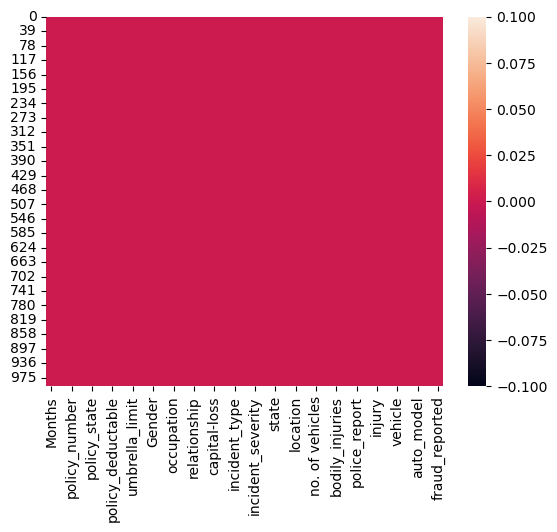

In [17]:
sns.heatmap(data.isnull())

 Check the null value using heatmap

In [18]:
data.describe()

,Months,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,hour of the day,no. of vehicles,bodily_injuries,witnesses,claim_amount,injury,property,vehicle,auto_year
count,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,203.829830,38.938939,546263.326326,1136.136136,1256.255495,1.102102e+06,501249.605606,25097.897898,-26820.520521,11.650651,1.839840,0.991992,1.486486,52743.073073,7434.344344,7393.943944,37914.784785,2005.104104
std,115.103809,9.140370,257190.576942,612.155989,244.243187,2.298293e+06,71728.919924,27871.869471,28105.366259,6.951671,1.019044,0.820538,1.111773,26408.011569,4883.309038,4823.859773,18890.397013,6.018773
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.500000,32.000000,335913.500000,500.000000,1089.185000,0.000000e+00,448373.000000,0.000000,-51500.000000,6.000000,1.000000,0.000000,1.000000,41775.000000,4290.000000,4440.000000,30275.000000,2000.000000
50%,199.000000,38.000000,533940.000000,1000.000000,1257.040000,0.000000e+00,466498.000000,0.000000,-24100.000000,12.000000,1.000000,1.000000,1.000000,57970.000000,6780.000000,6750.000000,42080.000000,2005.000000
75%,276.000000,44.000000,759459.500000,2000.000000,1415.710000,0.000000e+00,603254.000000,51000.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70550.000000,11310.000000,10870.000000,50775.000000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


This gives the statistical information of numerical columns. 

In this dataset we are check all mean standard deviation min 25% 50% 75% and max The summary of the dataset looks not perfect since there is negative/invalid values present.

as we have to seen here some columns who has maximum columns are very high like capital-gains, claim_amount, injury, property 

we will deal with the all skewness or outliers before training the model

The counts of all the columns are same which means there are no missing values in the dataset.

In [19]:
categorical_col = []
for i in data.dtypes.index:
    if data.dtypes[i]=="object":
        categorical_col.append(i)
print(" categorical columns :", categorical_col)
print('\n')

numerical_col = []
for i in data.dtypes.index:
    if data.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns: ", numerical_col)

 categorical columns : ['policy_bind_date', 'policy_state', 'policy_class', 'Gender', 'education_level', 'occupation', 'hobbies', 'relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities', 'state', 'city', 'location', 'property_damage', 'police_report', 'auto_make', 'auto_model', 'fraud_reported']


Numerical columns:  ['Months', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'hour of the day', 'no. of vehicles', 'bodily_injuries', 'witnesses', 'claim_amount', 'injury', 'property', 'vehicle', 'auto_year']


Here split the data into two parts one is categorical and another is numerical 

In [20]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

194    8
230    7
140    7
101    7
128    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: Months, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
30    42
38    42
31    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
42    32
36    32
44    32
28    30
45    26
26    26
47    24
48    24
27    24
57    16
49    14
25    14
55    14
50    13
53    13
54    10
24    10
61    10
60     9
51     9
56     8
58     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


342868    1
757644    1
223404    1
991480    1
804219    1
         ..
620855    1
583169    1
337677    1
445973    1
556080    1
Name: policy_number, Length: 999, dtype: int64


05-08-1992    3
01-01-2006    3
28-04-1992    3
09-08-2004    2
09-03-2003    2
             ..
12-12-1998    1
18-02-1999    1
30-10-1997    1
29-11-1999    1
11-11-1996    1
Name: policy_bind_date, Length: 950, dtype: int64


OH    351


# Data Visualization

N    753
Y    246
Name: fraud_reported, dtype: int64


<Axes: xlabel='fraud_reported', ylabel='count'>

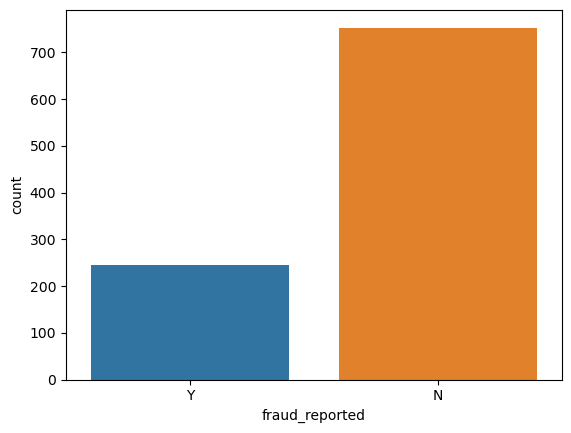

In [21]:
print(data['fraud_reported'].value_counts())
sns.countplot(x='fraud_reported', data=data)

as we see in this fraud_reported dataset No is more than yes  

FEMALE    537
MALE      462
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

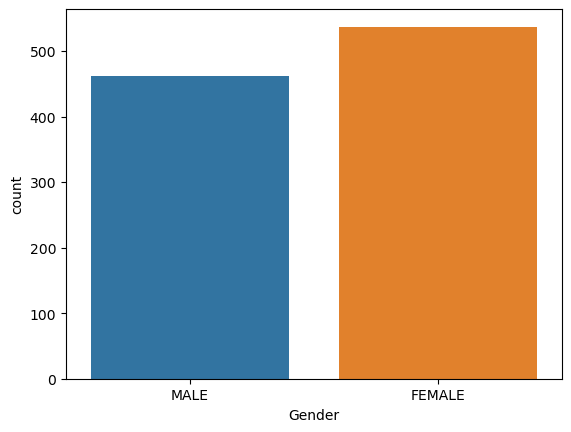

In [22]:
print(data['Gender'].value_counts())
sns.countplot(x='Gender',  data=data)

as we see in this gender dataset female is more than male 

<Axes: xlabel='state', ylabel='count'>

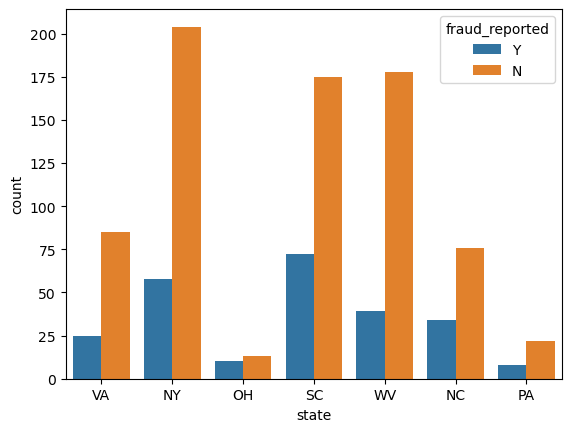

In [23]:
sns.countplot(x='state', hue='fraud_reported', data=data)

as we see in this state data state of SC are more no. of fraud done

<Axes: xlabel='policy_state', ylabel='count'>

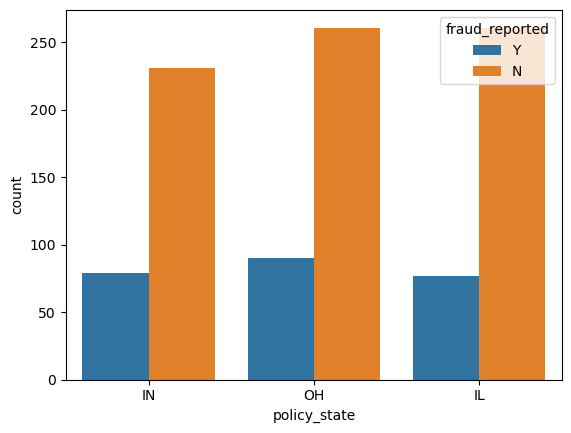

In [24]:
sns.countplot(x='policy_state', hue='fraud_reported', data=data)

as we see in this police_state dataset OH is more than others data

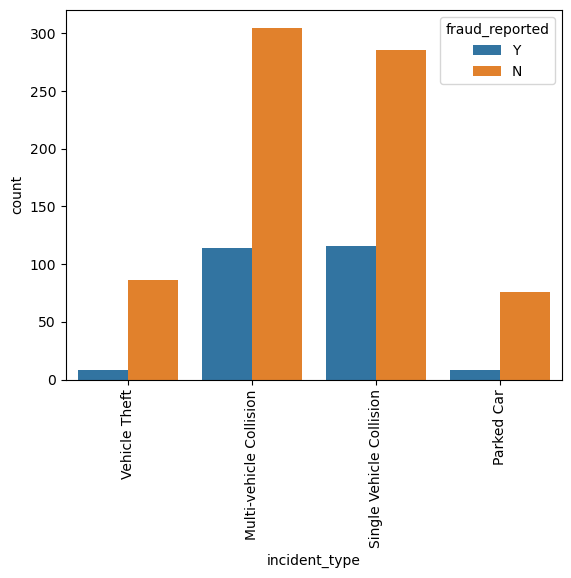

In [25]:
sns.countplot(x='incident_type', hue='fraud_reported', data=data)
plt.xticks(rotation=90)
plt.show()

as we see in this incident_type dataset multi vehicle collision and single vehicle collision is more accident 

<Axes: xlabel='property_damage', ylabel='count'>

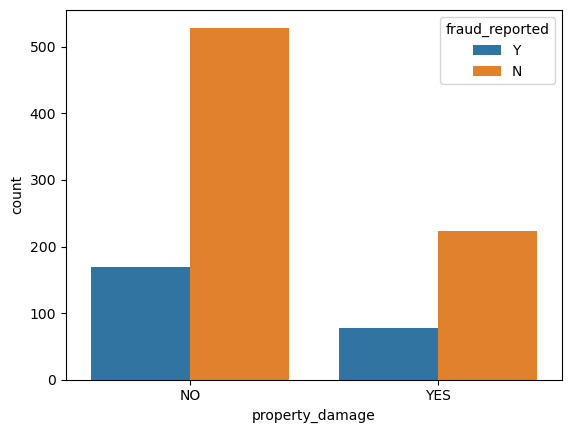

In [26]:
sns.countplot(x='property_damage', hue='fraud_reported', data=data)

as we see in this property_damage dataset not more property are damaged  

<Axes: xlabel='collision_type', ylabel='count'>

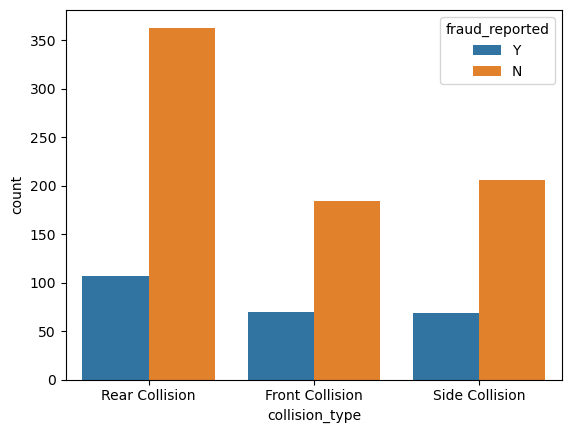

In [27]:
sns.countplot(x='collision_type', hue='fraud_reported', data=data)

as we see in this collision_type dataset rear collision is some affected

<Axes: xlabel='education_level', ylabel='count'>

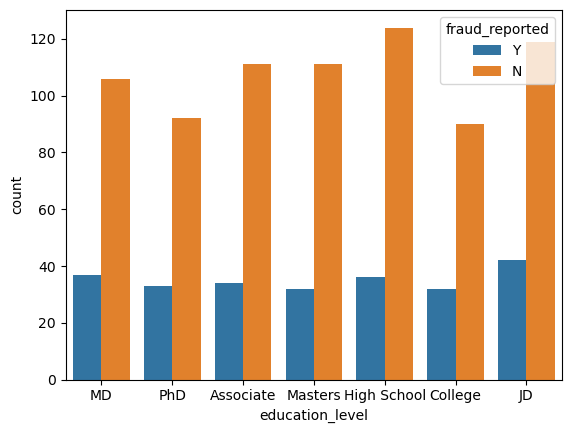

In [28]:
sns.countplot(x='education_level', hue='fraud_reported', data=data)

as we see in this education_level dataset the people who has done whose education in JD they are affected little bit more for others 

<Axes: xlabel='policy_class', ylabel='count'>

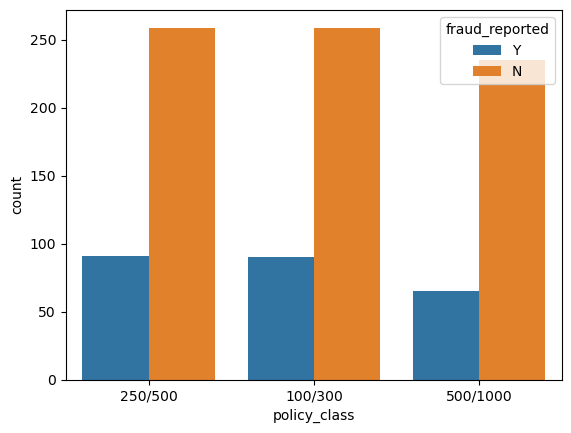

In [29]:
sns.countplot(x='policy_class', hue='fraud_reported', data=data)

as we see in this policy_class dataset all are equally affected 

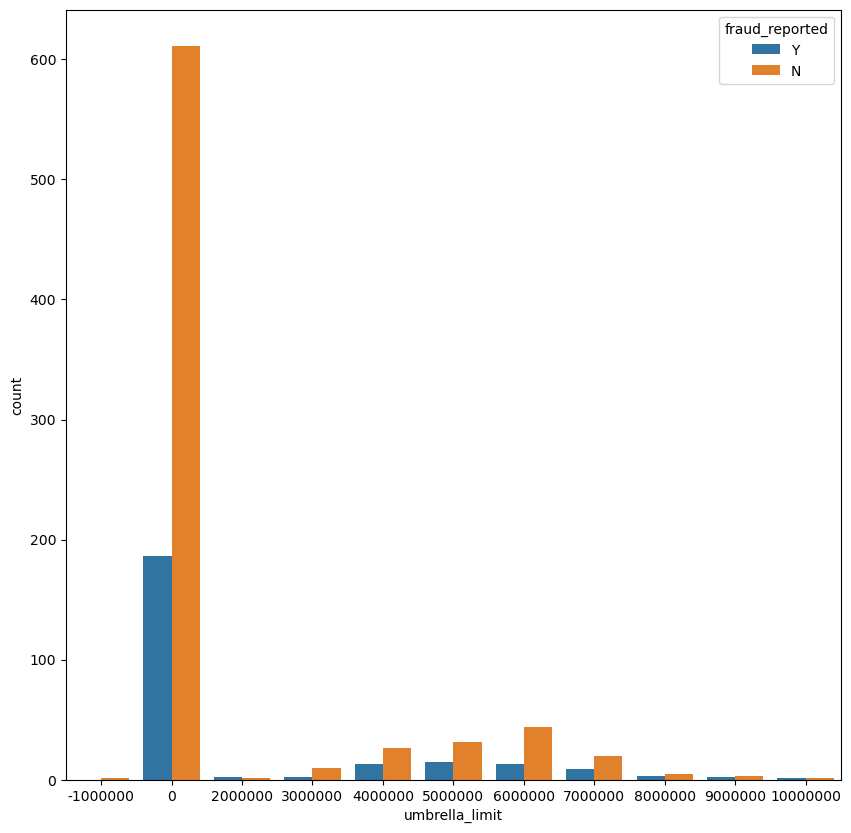

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(x='umbrella_limit', hue='fraud_reported', data=data)
plt.show()

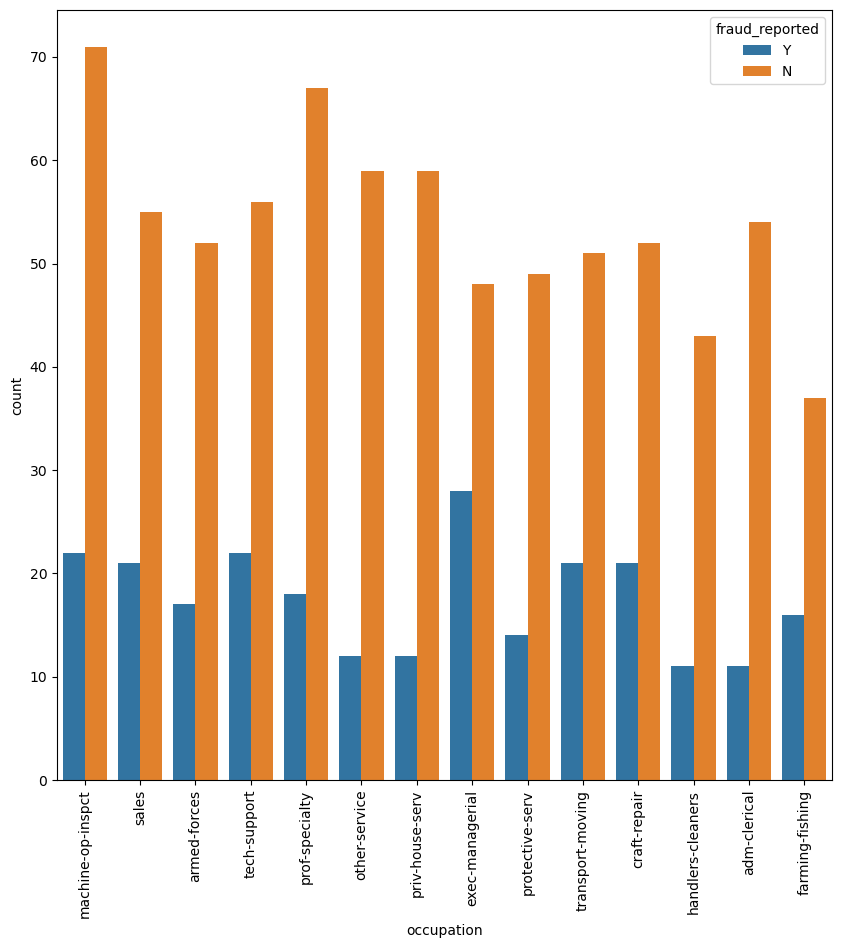

In [31]:
plt.figure(figsize=(10,10))
sns.countplot(x='occupation', hue='fraud_reported', data=data)
plt.xticks(rotation=90)
plt.show()

own-child         183
other-relative    177
not-in-family     174
husband           169
wife              155
unmarried         141
Name: relationship, dtype: int64


<Axes: xlabel='relationship', ylabel='count'>

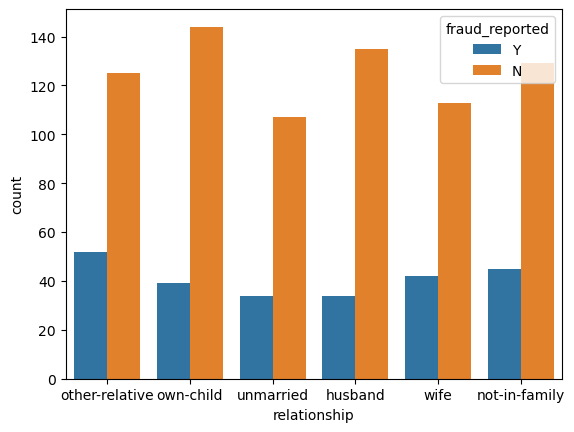

In [32]:
print(data['relationship'].value_counts())
sns.countplot(x='relationship', hue='fraud_reported', data=data)

<Axes: xlabel='incident_severity', ylabel='count'>

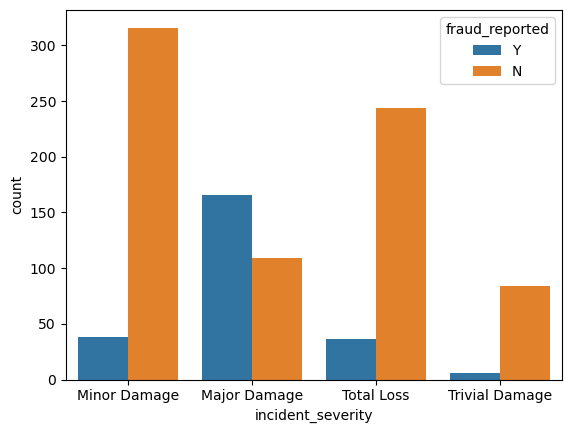

In [33]:
sns.countplot(x='incident_severity', hue='fraud_reported', data=data)

<Axes: xlabel='authorities', ylabel='count'>

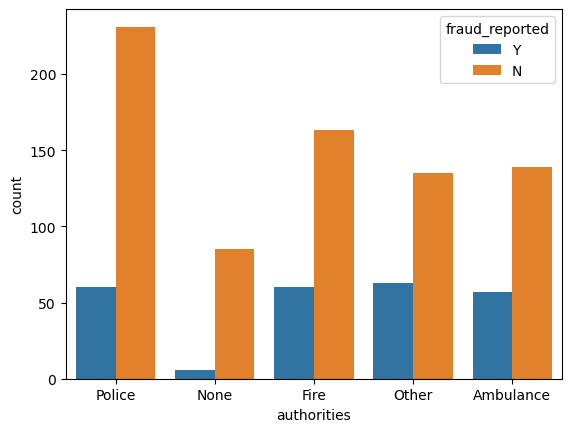

In [34]:
sns.countplot(x='authorities', hue='fraud_reported', data=data)

<Axes: xlabel='city', ylabel='count'>

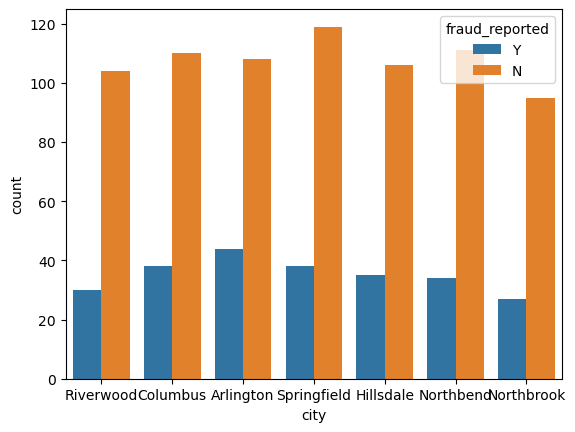

In [35]:
sns.countplot(x='city', hue='fraud_reported', data=data)

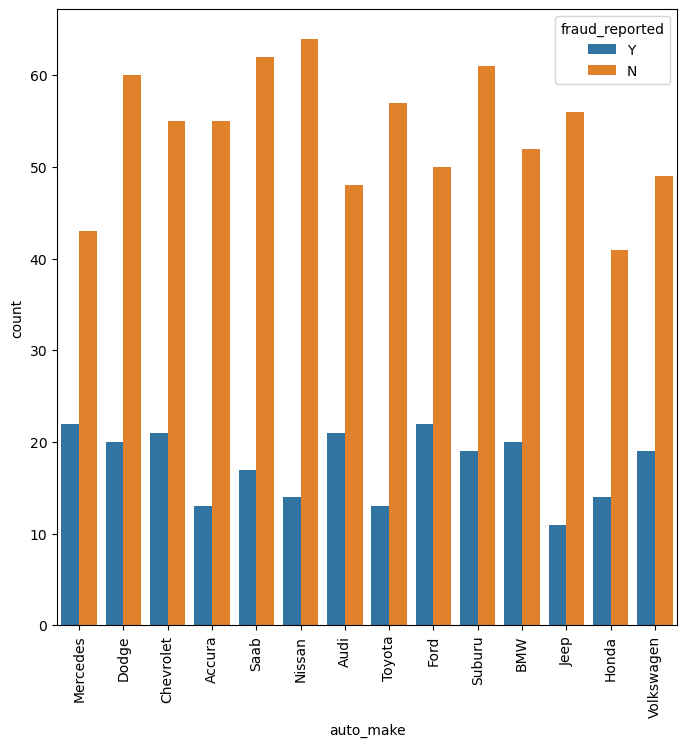

In [36]:
plt.figure(figsize=(8,8))
sns.countplot(x='auto_make', hue='fraud_reported', data=data)
plt.xticks(rotation=90)
plt.show()

In [37]:
from sklearn.preprocessing import OrdinalEncoder

In [38]:
ord_enc = OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes==object:
        data[i]=ord_enc.fit_transform(data[i].values.reshape(-1,1))
        

data        

,Months,age,policy_number,policy_bind_date,policy_state,policy_class,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report,claim_amount,injury,property,vehicle,auto_make,auto_model,auto_year,fraud_reported
0,228,42,342868,820.0,1.0,1.0,2000,1197.22,5000000,468176,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
1,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,3,0.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
2,256,41,227811,765.0,0.0,1.0,2000,1415.74,6000000,608117,...,2,0.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
3,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1,0.0,6500,1300,650,4550,0.0,31.0,2009,0.0
4,256,39,104594,385.0,2.0,1.0,1000,1351.10,0,478456,...,2,0.0,64100,6410,6410,51280,10.0,3.0,2003,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,487.0,2.0,2.0,1000,1310.80,0,431289,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0
995,285,41,186934,129.0,0.0,0.0,1000,1436.79,0,608177,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0
996,130,34,918516,509.0,2.0,1.0,500,1383.49,3000000,442797,...,3,1.0,67500,7500,7500,52500,11.0,19.0,1996,0.0
997,458,62,533940,572.0,0.0,2.0,2000,1356.92,5000000,441714,...,1,1.0,46980,5220,5220,36540,1.0,5.0,1998,0.0


# Encoding the data using OrdinalEncoder

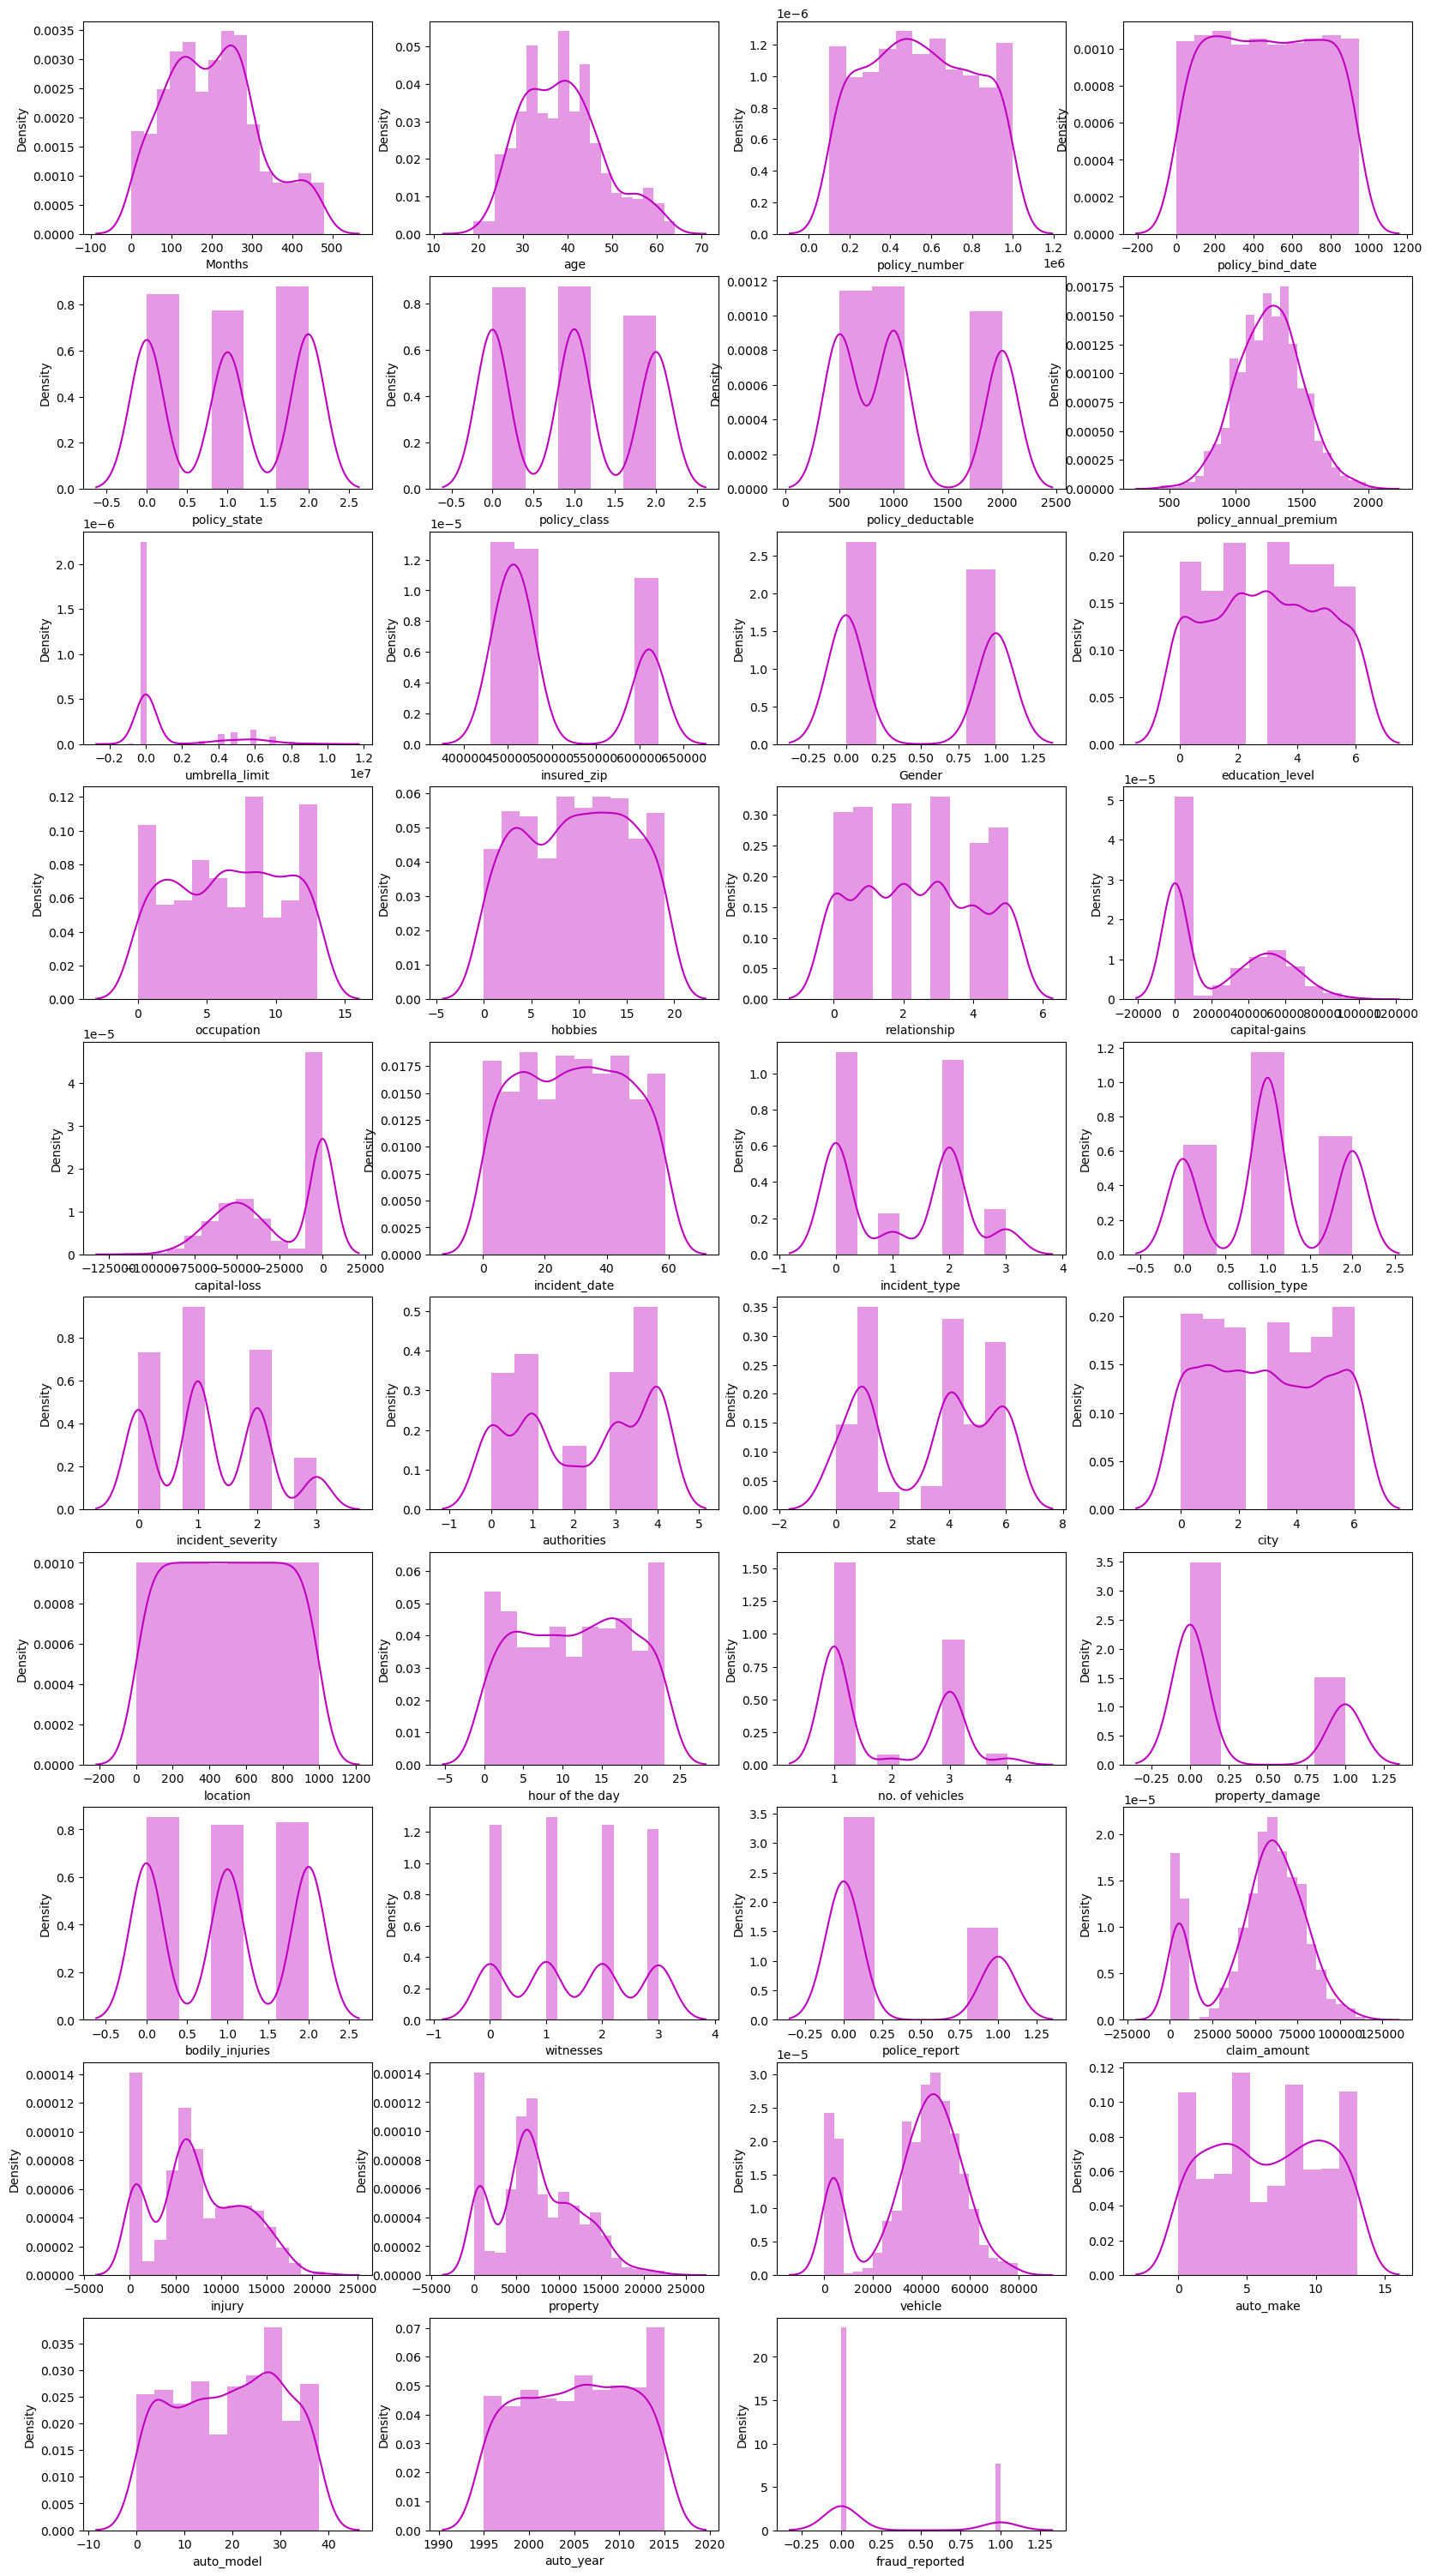

In [39]:
plt.figure(figsize=(20,38), facecolor='white')
plotnumber = 1

for columns in data:
    if plotnumber<=40:
        ax =plt.subplot(10,4,plotnumber)
        sns.distplot(data[columns], color='m')
        plt.xlabel(columns, fontsize=10)
    plotnumber+=1
plt.show()

As we see in this dataset we checked the distribution of all columns using multivariate Analysis 

In [40]:
data.corr()

,Months,age,policy_number,policy_bind_date,policy_state,policy_class,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report,claim_amount,injury,property,vehicle,auto_make,auto_model,auto_year,fraud_reported
Months,1.000000,0.922018,0.057692,0.054837,-0.001611,-0.026901,0.027064,0.004355,0.016027,0.018436,...,0.057924,-0.023781,0.061389,0.065572,0.033725,0.060256,0.046775,0.005990,-0.000094,0.018699
age,0.922018,1.000000,0.059538,0.056361,-0.015729,-0.015253,0.029423,0.013801,0.018613,0.026106,...,0.051932,-0.021942,0.069206,0.075749,0.059812,0.061892,0.029586,0.019010,0.001536,0.010433
policy_number,0.057692,0.059538,1.000000,0.045722,0.072981,0.038923,-0.006759,0.022629,0.008923,0.007037,...,-0.012618,0.031366,-0.017946,-0.008780,-0.010573,-0.020117,0.023951,0.065171,-0.000201,-0.029320
policy_bind_date,0.054837,0.056361,0.045722,1.000000,0.015077,0.008452,-0.001715,-0.037882,-0.024775,-0.042683,...,-0.007070,-0.011848,0.015760,0.024209,0.008390,0.013631,-0.026179,0.000603,0.035074,0.060369
policy_state,-0.001611,-0.015729,0.072981,0.015077,1.000000,0.000955,0.010305,0.011733,-0.029034,0.009366,...,0.022430,0.067382,-0.006858,-0.046098,0.007030,0.000535,0.016123,-0.023346,0.002334,0.027418
policy_class,-0.026901,-0.015253,0.038923,0.008452,0.000955,1.000000,0.003397,0.023945,0.021667,0.006910,...,0.071479,-0.001737,-0.055816,-0.078808,-0.042316,-0.046850,-0.004755,0.048051,-0.033072,-0.037354
policy_deductable,0.027064,0.029423,-0.006759,-0.001715,0.010305,0.003397,1.000000,-0.003109,0.010764,0.004437,...,0.066750,0.038408,0.023005,0.039066,0.065097,0.005438,-0.035202,-0.003640,0.026065,0.015230
policy_annual_premium,0.004355,0.013801,0.022629,-0.037882,0.011733,0.023945,-0.003109,1.000000,-0.005953,0.032666,...,0.002047,0.021112,0.008657,-0.017519,-0.012384,0.019793,-0.000484,-0.030881,-0.049123,-0.015584
umbrella_limit,0.016027,0.018613,0.008923,-0.024775,-0.029034,0.021667,0.010764,-0.005953,1.000000,0.019441,...,-0.006518,-0.044115,-0.040016,-0.045509,-0.023249,-0.038240,-0.004034,0.039524,0.009807,0.059557
insured_zip,0.018436,0.026106,0.007037,-0.042683,0.009366,0.006910,0.004437,0.032666,0.019441,1.000000,...,0.020036,0.010579,-0.033536,-0.017590,-0.006275,-0.040732,-0.020482,0.022865,-0.032830,0.020257


check the correlation

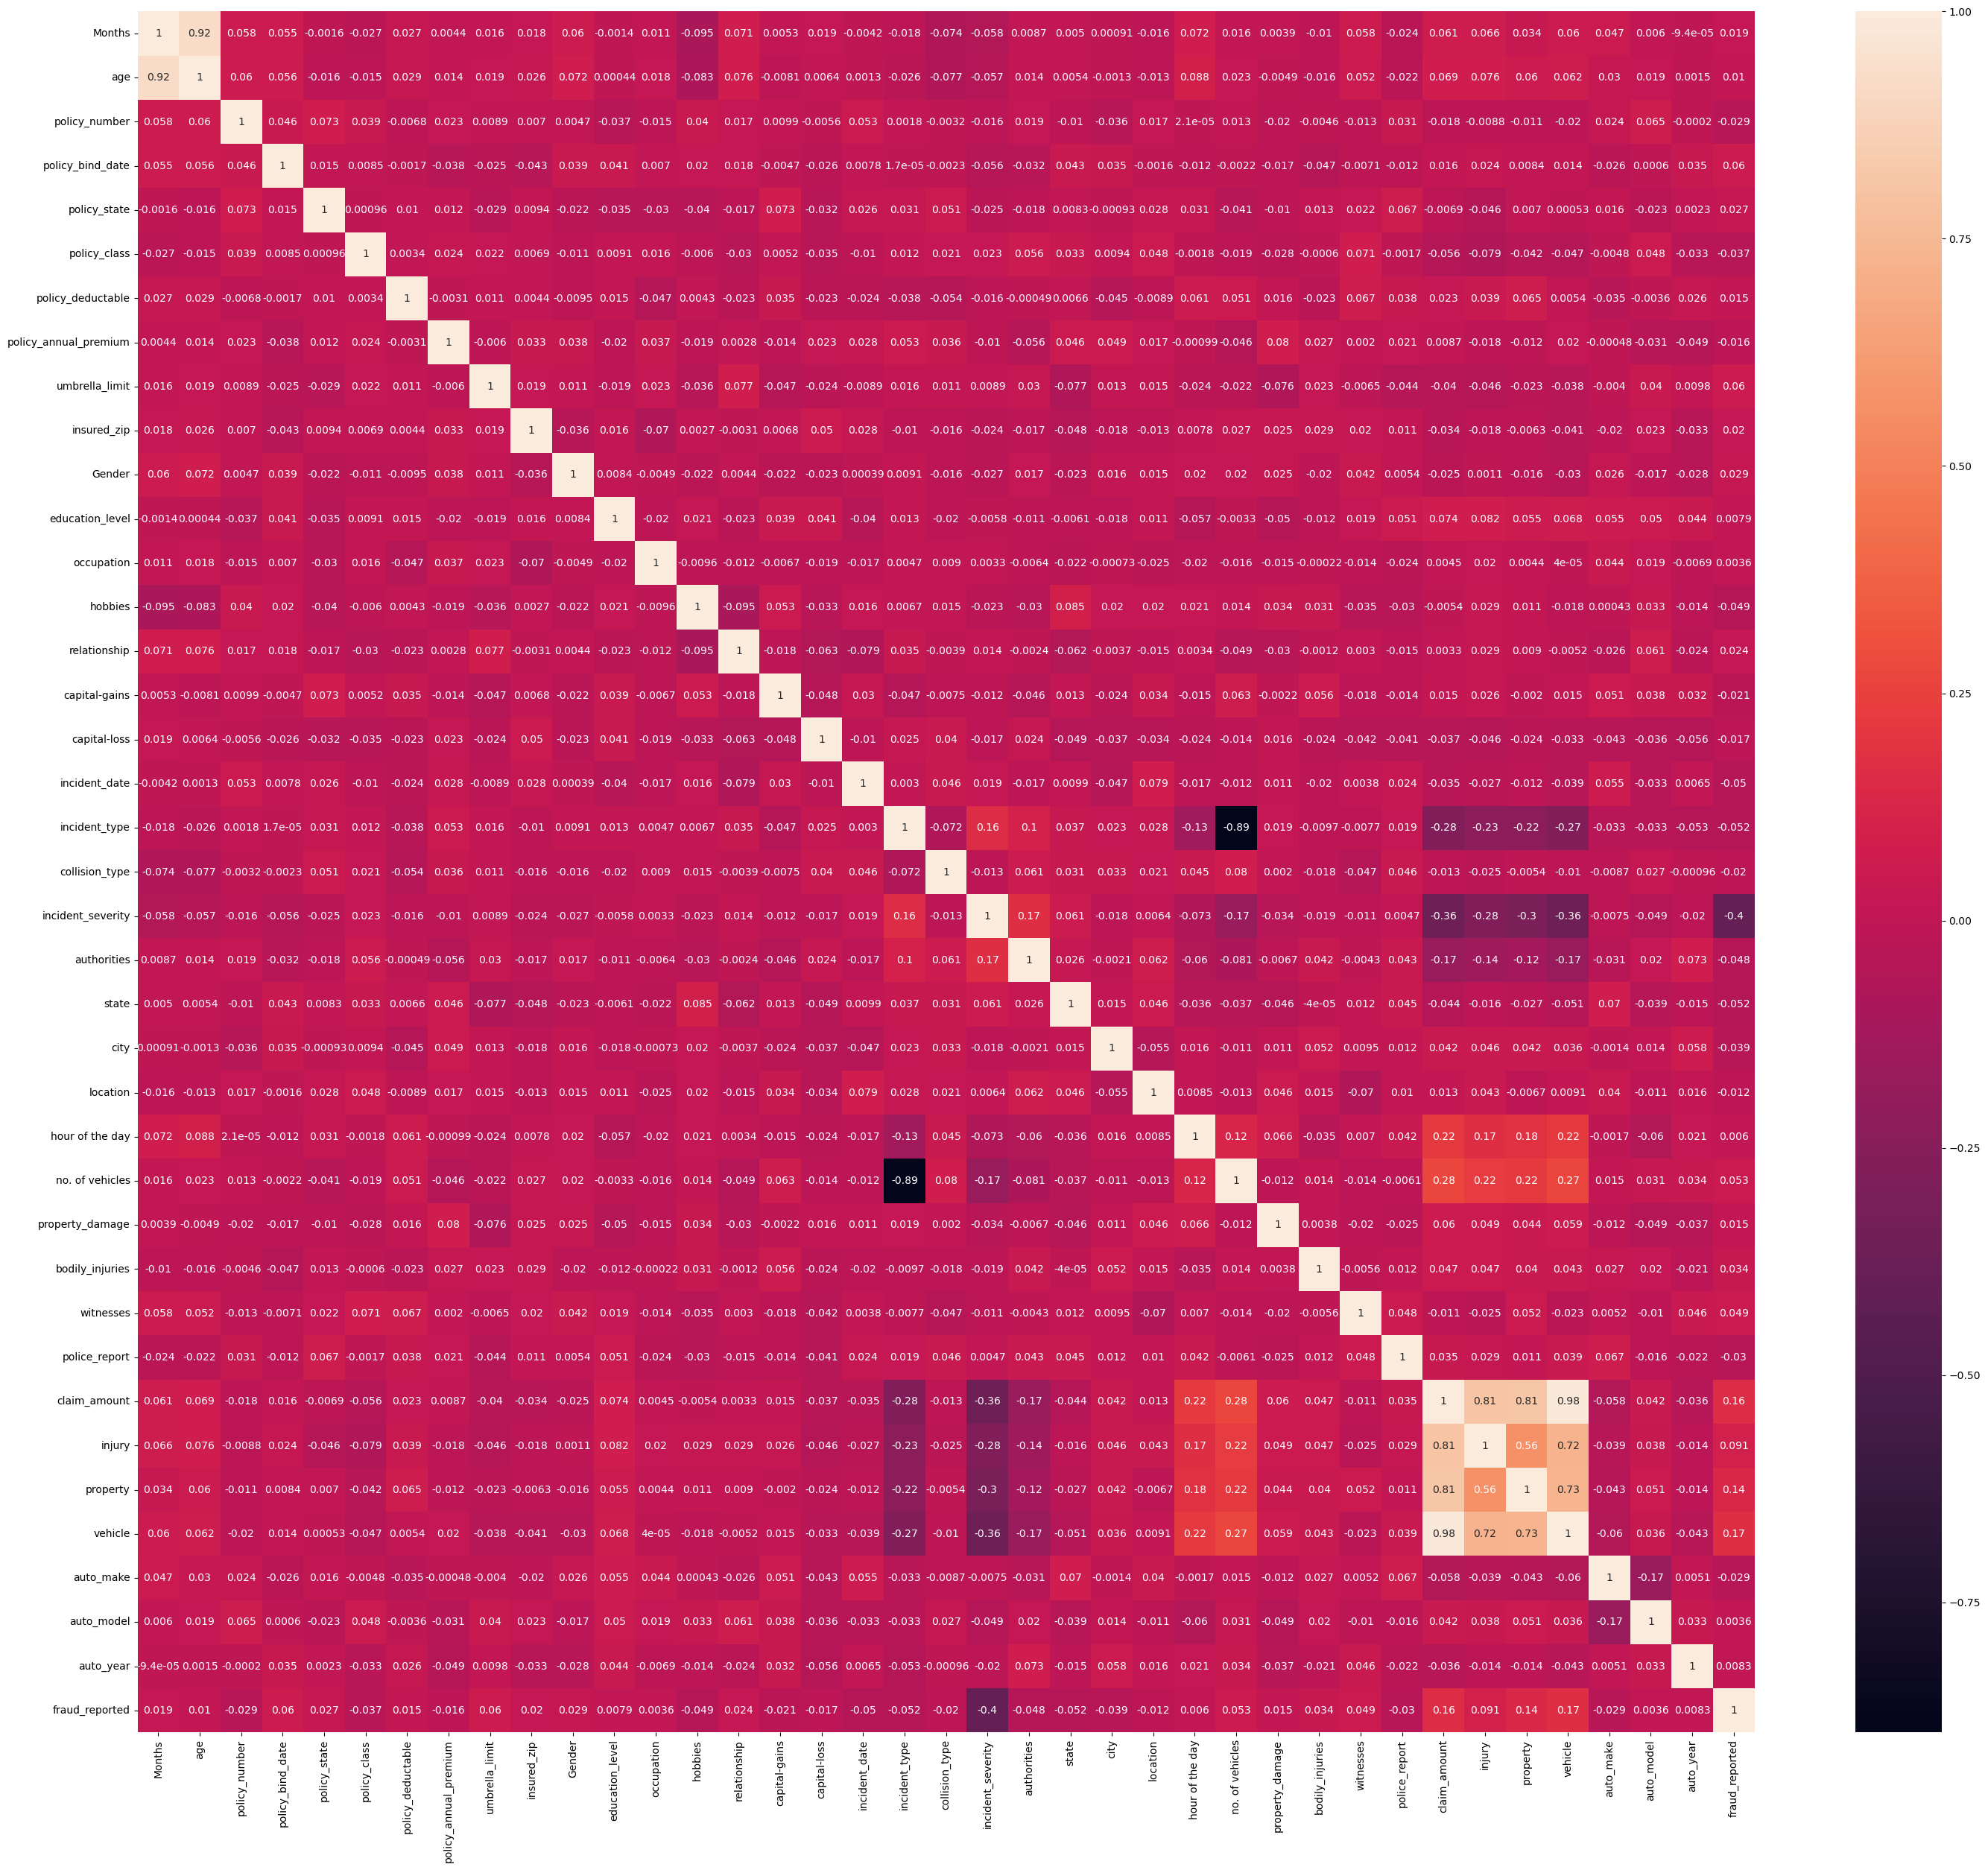

In [41]:
plt.figure(figsize=(35,30))
sns.heatmap(data.corr(), annot=True)
plt.show()

Check the co-relation using heatmap

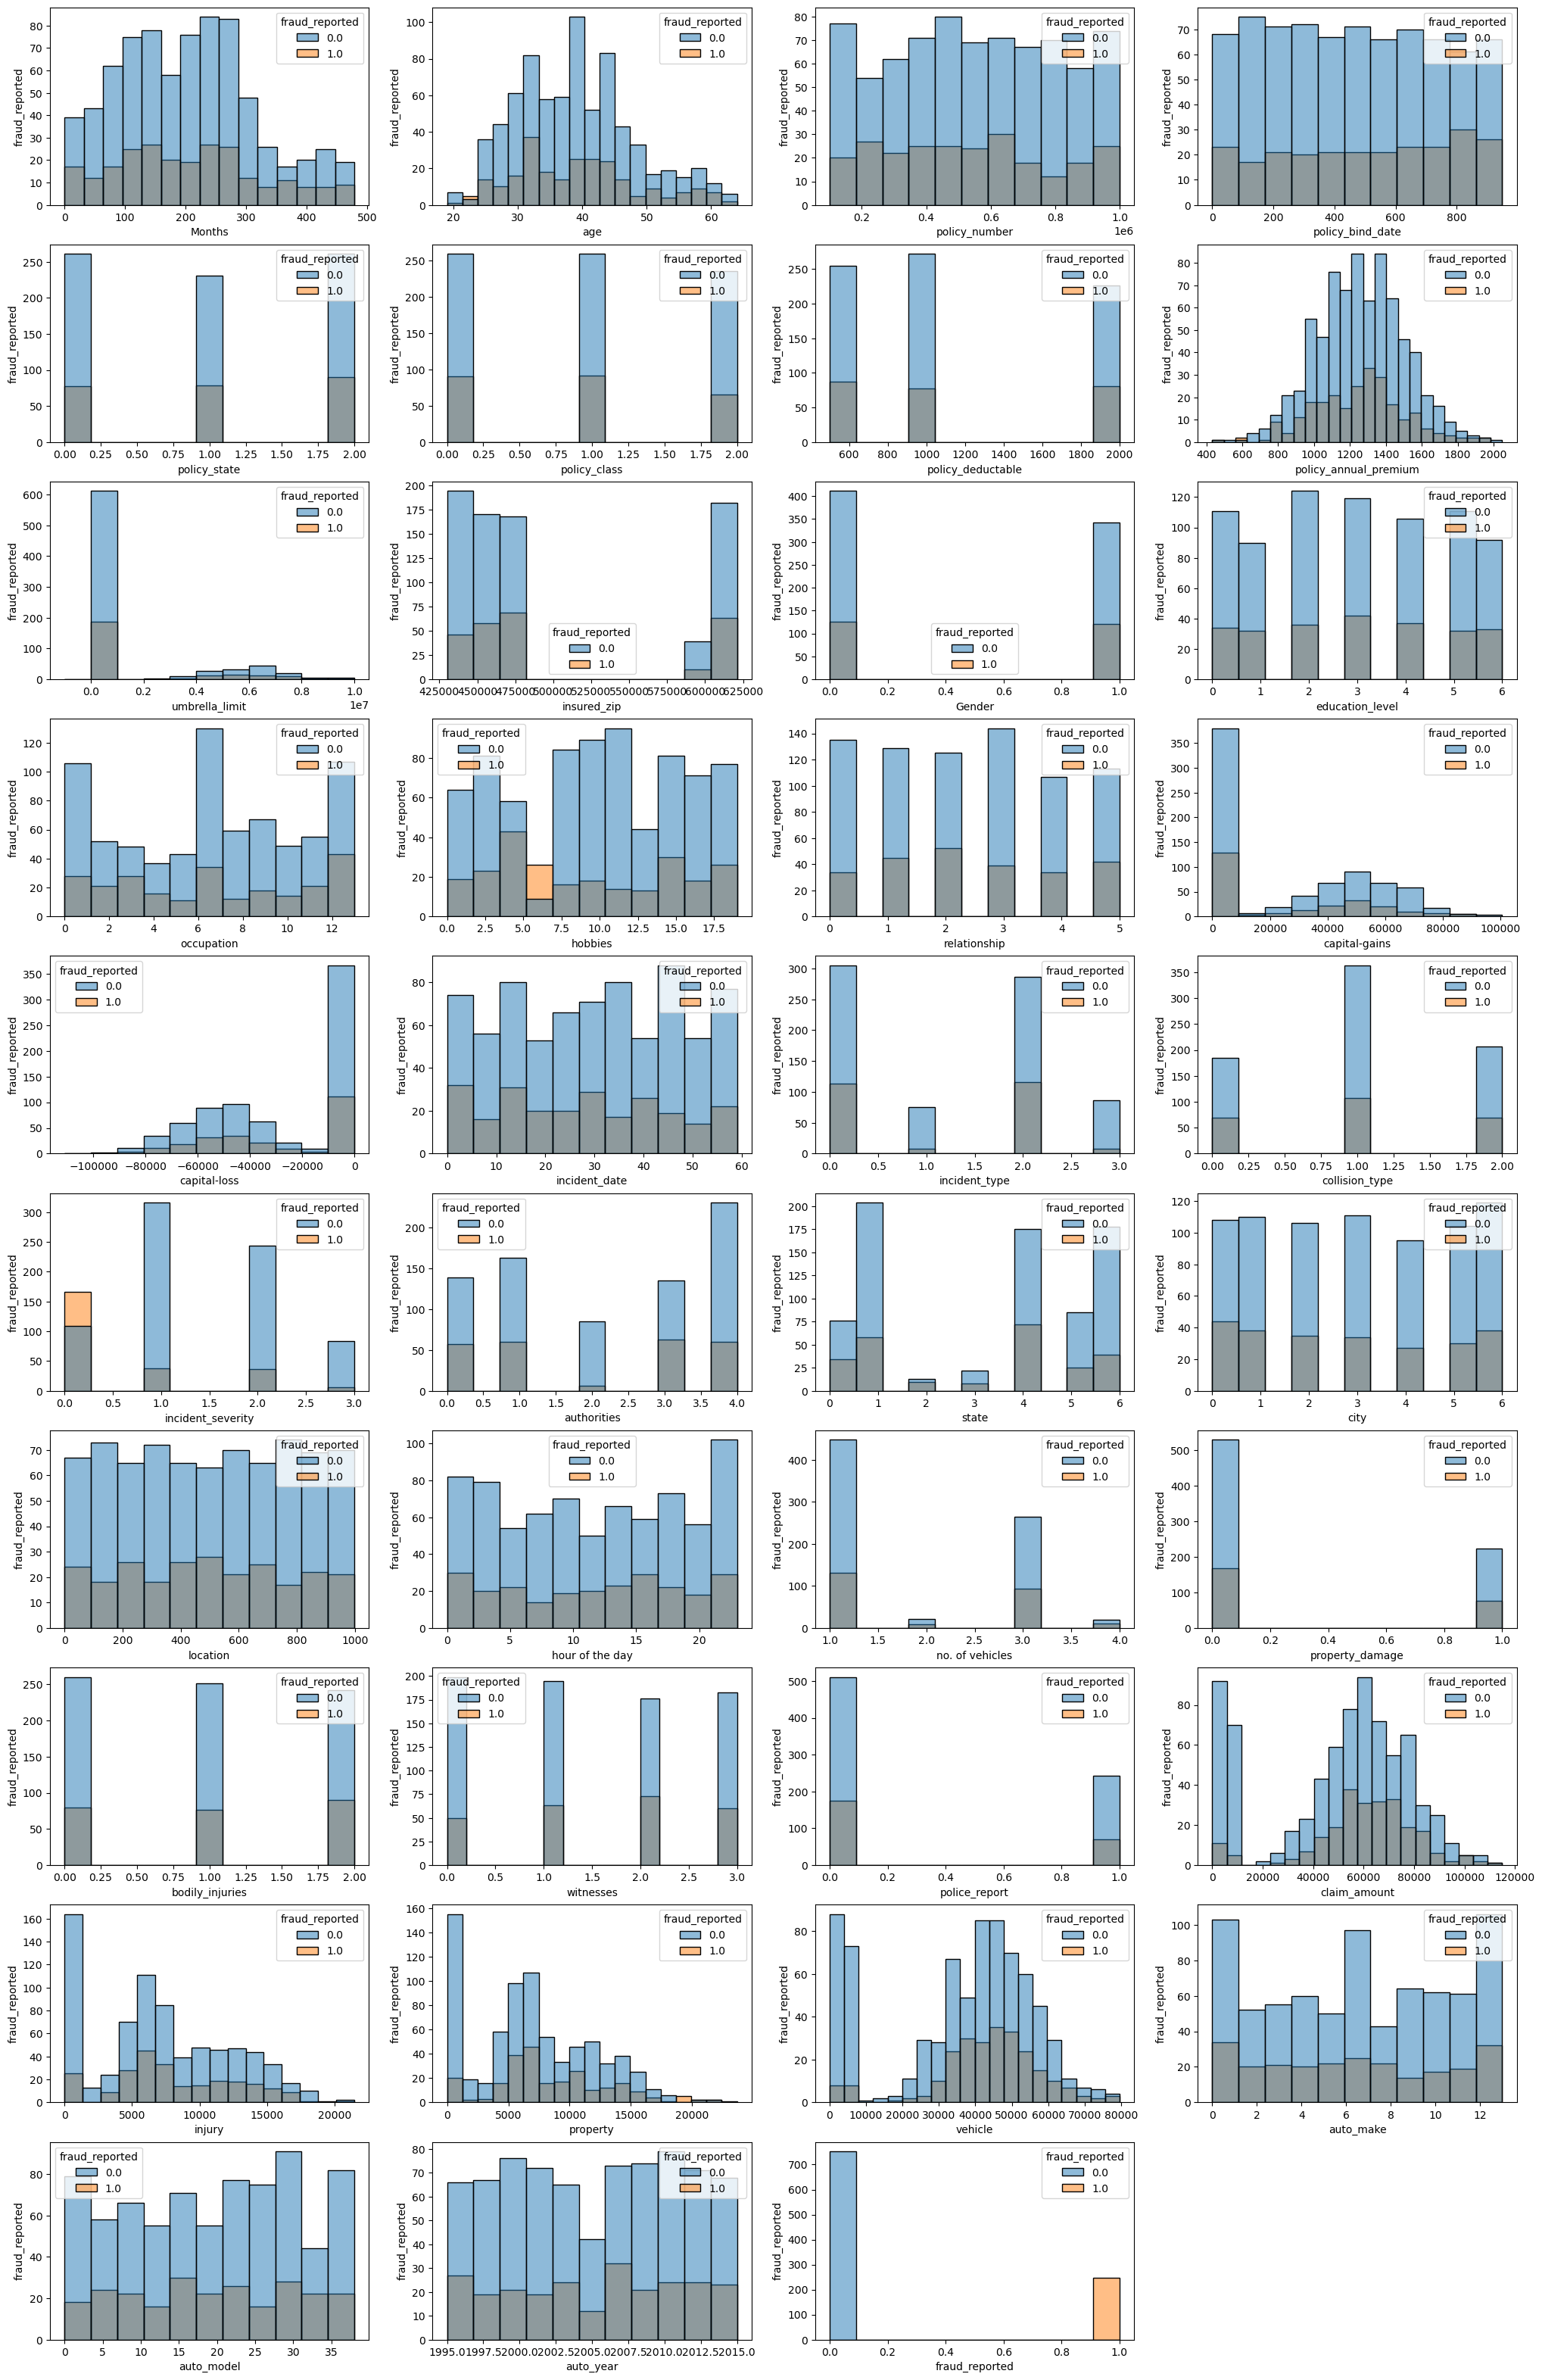

In [42]:
plt.figure(figsize=(25,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=40:
        ax = plt.subplot(10,4,plotnumber)
        sns.histplot(x=data[column].dropna(axis=0),hue=data.fraud_reported)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('fraud_reported', fontsize=10)
    plotnumber+=1
plt.show()

As we see in this dataset we checked the distribution of all columns using multivariate Analysis 

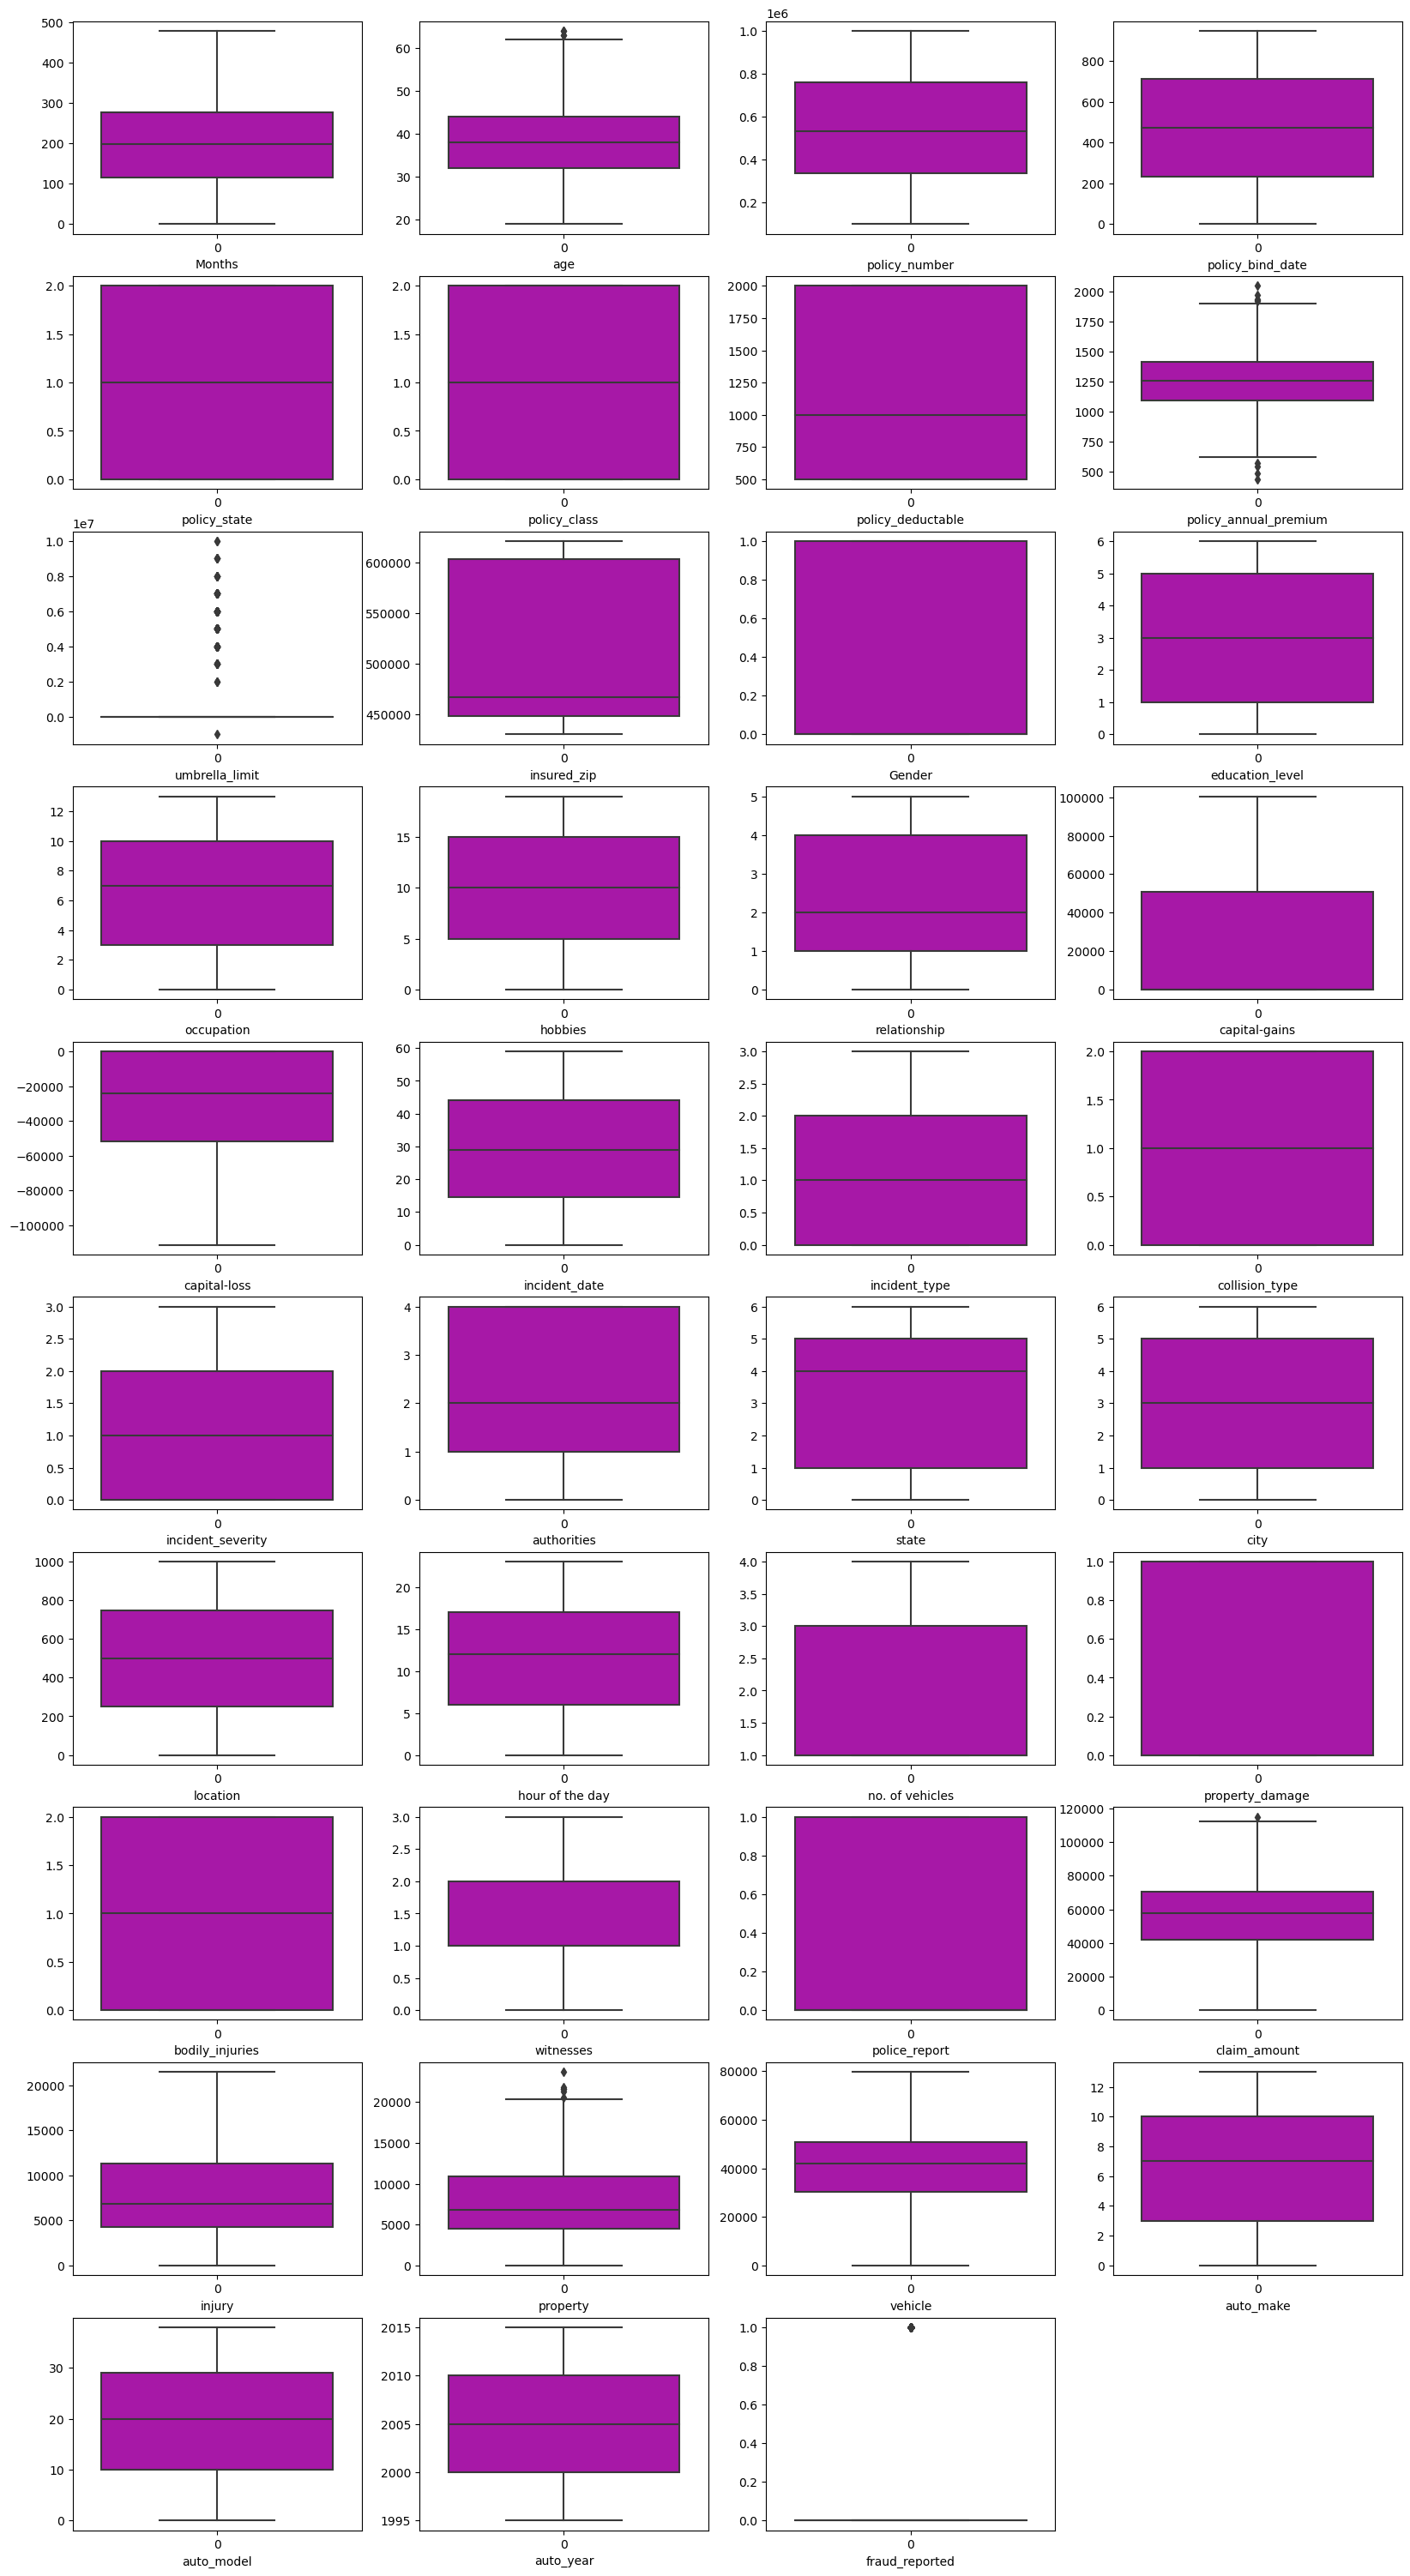

In [43]:
plt.figure(figsize=(20,38), facecolor='white')
plotnumber = 1

for columns in data:
    if plotnumber<=40:
        ax =plt.subplot(10,4,plotnumber)
        sns.boxplot(data[columns], color='m')
        plt.xlabel(columns, fontsize=10)
    plotnumber+=1
plt.show()

Check the outliers using boxplot

In [44]:
data.skew()

Months                   0.364615
age                      0.481461
policy_number            0.038684
policy_bind_date         0.005162
policy_state            -0.024326
policy_class             0.089067
policy_deductable        0.477027
policy_annual_premium    0.006022
umbrella_limit           1.805104
insured_zip              0.815086
Gender                   0.150802
education_level          0.001298
occupation              -0.060896
hobbies                 -0.059941
relationship             0.076349
capital-gains            0.481352
capital-loss            -0.389813
incident_date            0.006708
incident_type            0.103399
collision_type          -0.032150
incident_severity        0.277762
authorities             -0.120066
state                   -0.147805
city                     0.047574
location                 0.000000
hour of the day         -0.037615
no. of vehicles          0.501009
property_damage          0.867426
bodily_injuries          0.014799
witnesses     

Check the skewness so we find all is look parfect 

In [45]:
X = data.drop('fraud_reported',axis=1)
Y = data['fraud_reported']

make the data and target variable column seperately 

In [46]:
X

,Months,age,policy_number,policy_bind_date,policy_state,policy_class,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report,claim_amount,injury,property,vehicle,auto_make,auto_model,auto_year
0,228,42,342868,820.0,1.0,1.0,2000,1197.22,5000000,468176,...,0,0,0.0,5070,780,780,3510,8.0,12.0,2007
1,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,2,3,0.0,34650,7700,3850,23100,4.0,30.0,2007
2,256,41,227811,765.0,0.0,1.0,2000,1415.74,6000000,608117,...,1,2,0.0,63400,6340,6340,50720,3.0,34.0,2014
3,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,0,1,0.0,6500,1300,650,4550,0.0,31.0,2009
4,256,39,104594,385.0,2.0,1.0,1000,1351.10,0,478456,...,0,2,0.0,64100,6410,6410,51280,10.0,3.0,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,487.0,2.0,2.0,1000,1310.80,0,431289,...,0,1,0.0,87200,17440,8720,61040,6.0,6.0,2006
995,285,41,186934,129.0,0.0,0.0,1000,1436.79,0,608177,...,2,3,0.0,108480,18080,18080,72320,13.0,28.0,2015
996,130,34,918516,509.0,2.0,1.0,500,1383.49,3000000,442797,...,2,3,1.0,67500,7500,7500,52500,11.0,19.0,1996
997,458,62,533940,572.0,0.0,2.0,2000,1356.92,5000000,441714,...,0,1,1.0,46980,5220,5220,36540,1.0,5.0,1998


In [47]:
Y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
994    0.0
995    0.0
996    0.0
997    0.0
998    0.0
Name: fraud_reported, Length: 999, dtype: float64

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,Months,age,policy_number,policy_bind_date,policy_state,policy_class,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report,claim_amount,injury,property,vehicle,auto_make,auto_model,auto_year
0,0.210091,0.335062,-0.791231,1.258920,-0.015671,0.060967,1.411889,-0.241829,1.696847,-0.461323,...,-1.209559,-1.337711,-0.675476,-1.806155,-1.363354,-1.371776,-1.822197,0.361348,-0.659683,0.315155
1,-0.606972,-1.087912,0.550197,-1.046793,1.188606,-1.182018,1.411889,0.642651,1.696847,-0.985000,...,1.229087,1.362033,-0.675476,-0.685479,0.054428,-0.735038,-0.784642,-0.630374,0.958876,0.315155
2,0.453472,0.225603,-1.238816,1.058897,-1.219948,0.060967,1.411889,0.653301,2.132170,1.490625,...,0.009764,0.462118,-0.675476,0.403751,-0.224211,-0.218595,0.678209,-0.878305,1.318556,1.478765
3,0.210091,0.553982,-0.695585,-1.064977,-1.219948,1.303953,-0.222499,1.342181,2.132170,1.526737,...,-1.209559,-0.437796,-0.675476,-1.751977,-1.256815,-1.398739,-1.767115,-1.622096,1.048796,0.647615
4,0.453472,0.006684,-1.718144,-0.323076,1.188606,0.060967,-0.222499,0.388514,-0.479771,-0.317933,...,-1.209559,0.462118,-0.675476,0.430272,-0.209869,-0.204077,0.707868,0.857209,-1.468963,-0.349765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,-1.745645,-0.102776,1.538881,0.047875,1.188606,1.303953,-0.222499,0.223432,-0.479771,-0.975836,...,-1.209559,-0.437796,-0.675476,1.305444,2.049976,0.275033,1.224792,-0.134513,-1.199203,0.148925
995,0.705544,0.225603,-1.397832,-1.254089,-1.219948,-1.182018,-0.222499,0.739529,-0.479771,1.491462,...,1.229087,1.362033,-0.675476,2.111664,2.181101,2.216360,1.822219,1.601001,0.779036,1.644995
996,-0.641741,-0.540614,1.448106,0.127884,1.188606,0.060967,-1.039694,0.521195,0.826200,-0.815318,...,1.229087,1.362033,1.480437,0.559085,0.013452,0.021997,0.772484,1.105140,-0.030243,-1.513376
997,2.209288,2.524254,-0.047939,0.357001,-1.219948,1.303953,1.411889,0.412355,1.696847,-0.830424,...,-1.209559,-0.437796,1.480437,-0.218341,-0.453679,-0.450891,-0.072813,-1.374166,-1.289123,-1.180916


Scaling the data using StandardScaler

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(X.values, i)for i in range(len(X.columns))]
vif['Features'] = X.columns


vif

,VIF Values,Features
0,6.832237,Months
1,6.846318,age
2,1.032246,policy_number
3,1.027217,policy_bind_date
4,1.038659,policy_state
5,1.031906,policy_class
6,1.037257,policy_deductable
7,1.039121,policy_annual_premium
8,1.032066,umbrella_limit
9,1.029725,insured_zip


Check the outliers using variance inflation factor

In [52]:
X.drop(['claim_amount','injury','property','vehicle'],axis=1,inplace=True)

Remove the some columns who is looking nan in the dataset 

In [53]:
vif = pd.DataFrame()
vif['VIF Values']= [variance_inflation_factor(X.values, i )for i in range (len(X.columns))]
vif['Features'] = X.columns

vif

,VIF Values,Features
0,6.771261,Months
1,6.788084,age
2,1.031617,policy_number
3,1.027029,policy_bind_date
4,1.033926,policy_state
5,1.025639,policy_class
6,1.026715,policy_deductable
7,1.034337,policy_annual_premium
8,1.030553,umbrella_limit
9,1.023148,insured_zip


Now its look parfect 

In [54]:
Y.value_counts()

0.0    753
1.0    246
Name: fraud_reported, dtype: int64

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
sm = SMOTE()
X1, Y1 = sm.fit_resample(X,Y)

sampling the data using SMOTE method

In [57]:
Y1.value_counts()

1.0    753
0.0    753
Name: fraud_reported, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Find the best accuracy score

In [59]:
maxAcc = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size =.30, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is ", maxAcc, "at random_state", maxRS)

Best accuracy is  0.8266666666666667 at random_state 18


Train and test the data 

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =.30, random_state=maxRS)

# Classification library

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

# LogisticRegression

In [62]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
pred = LR.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8266666666666667
[[224  10]
 [ 42  24]]
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90       234
         1.0       0.71      0.36      0.48        66

    accuracy                           0.83       300
   macro avg       0.77      0.66      0.69       300
weighted avg       0.81      0.83      0.80       300



The accurracy for this model is 82 % score using LogisticRegression

# RandomForestClassifier

In [63]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
pred = RF.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.81
[[224  10]
 [ 47  19]]
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       234
         1.0       0.66      0.29      0.40        66

    accuracy                           0.81       300
   macro avg       0.74      0.62      0.64       300
weighted avg       0.79      0.81      0.78       300



The accurracy for this model is 81 % score using RandomForestClassifier

# SVC

In [64]:
svc = SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7833333333333333
[[234   0]
 [ 65   1]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88       234
         1.0       1.00      0.02      0.03        66

    accuracy                           0.78       300
   macro avg       0.89      0.51      0.45       300
weighted avg       0.83      0.78      0.69       300



The accurracy for this model is 78 % score using SVC

# GradientBoostingClassifier

In [65]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred = gbc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8766666666666667
[[216  18]
 [ 19  47]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       234
         1.0       0.72      0.71      0.72        66

    accuracy                           0.88       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.88      0.88      0.88       300



The accurracy for this model is 87 % score using GradientBoostingClassifier

# AdaBoostClassifier

In [66]:
ab = AdaBoostClassifier()
ab.fit(x_train, y_train)
pred = ab.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8066666666666666
[[213  21]
 [ 37  29]]
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       234
         1.0       0.58      0.44      0.50        66

    accuracy                           0.81       300
   macro avg       0.72      0.67      0.69       300
weighted avg       0.79      0.81      0.80       300



The accurracy for this model is 80 % score using AdaBoostClassifier

# BaggingClassifier

In [67]:
bc = BaggingClassifier()
bc.fit(x_train, y_train)
pred = bc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8666666666666667
[[215  19]
 [ 21  45]]
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91       234
         1.0       0.70      0.68      0.69        66

    accuracy                           0.87       300
   macro avg       0.81      0.80      0.80       300
weighted avg       0.87      0.87      0.87       300



The accurracy for this model is 86 % score using BaggingClassifier

# KNN

In [68]:
knn = KNN()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.77
[[220  14]
 [ 55  11]]
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       234
         1.0       0.44      0.17      0.24        66

    accuracy                           0.77       300
   macro avg       0.62      0.55      0.55       300
weighted avg       0.72      0.77      0.73       300



The accurracy for this model is 77 % score using KNN

# DecisionTreeClassifier

In [69]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred = dtc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8366666666666667
[[206  28]
 [ 21  45]]
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89       234
         1.0       0.62      0.68      0.65        66

    accuracy                           0.84       300
   macro avg       0.76      0.78      0.77       300
weighted avg       0.84      0.84      0.84       300



The accurracy for this model is 83 % score using DecisionTreeClassifier

# ExtraTreesClassifier

In [70]:
etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)
pred = etc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7866666666666666
[[231   3]
 [ 61   5]]
              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88       234
         1.0       0.62      0.08      0.14        66

    accuracy                           0.79       300
   macro avg       0.71      0.53      0.51       300
weighted avg       0.75      0.79      0.71       300



The accurracy for this model is 78 % score using ExtraTreesClassifier

In [71]:
score = cross_val_score(LR, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.7384106  0.72425249 0.70099668 0.75415282 0.75415282]
0.7343930826604474
Difference between accuracy score and cross validation score is - 0.052273584006219176


In [72]:
score = cross_val_score(RF, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.75827815 0.82724252 0.910299   0.94019934 0.94352159]
0.8759081208334252
Difference between accuracy score and cross validation score is - -0.08924145416675855


In [73]:
score = cross_val_score(svc, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.79801325 0.83388704 0.88704319 0.93023256 0.9269103 ]
0.8752172669468218
Difference between accuracy score and cross validation score is - -0.08855060028015516


In [74]:
score = cross_val_score(gbc, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.77483444 0.84053156 0.88372093 0.93687708 0.92026578]
0.8712459571846605
Difference between accuracy score and cross validation score is - -0.08457929051799384


In [75]:
score = cross_val_score(ab, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.68543046 0.79401993 0.91694352 0.92358804 0.94019934]
0.8520362588281886
Difference between accuracy score and cross validation score is - -0.06536959216152194


In [76]:
score = cross_val_score(bc, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.80794702 0.85714286 0.89036545 0.93023256 0.93023256]
0.883184088358892
Difference between accuracy score and cross validation score is - -0.09651742169222532


In [77]:
score = cross_val_score(dtc, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.75827815 0.80730897 0.88039867 0.910299   0.87043189]
0.8453433367802689
Difference between accuracy score and cross validation score is - -0.058676670113602225


In [78]:
score = cross_val_score(knn, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.59933775 0.63787375 0.64451827 0.68770764 0.67774086]
0.6494356559811665
Difference between accuracy score and cross validation score is - 0.13723101068550014


In [79]:
score = cross_val_score(etc, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.87417219 0.88039867 0.94019934 0.95681063 0.96013289]
0.9223427427339332
Difference between accuracy score and cross validation score is - -0.13567607606726662


From the difference of both R2 score and cross validation score computed on R2 score we can conclude that GradientBoostingClassifier  as our best finding and best performing model.

# Hyperparameter tuning using best model

In [81]:
from sklearn.model_selection import GridSearchCV

parameters = {'min_samples_split': [1,2],
             'warm_start':[True,False],
             'max_depth':[1,2,3],
             'learning_rate':[0.1],
             'n_estimators':[10,30,50,80,100]}

In [82]:
gbc = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5)

In [83]:
gbc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1], 'max_depth': [1, 2, 3],
                         'min_samples_split': [1, 2],
                         'n_estimators': [10, 30, 50, 80, 100],
                         'warm_start': [True, False]})

Here we take the parameter which is model predicted 

In [84]:
gbc.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 30,
 'warm_start': True}

In [85]:
model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=30, warm_start=True)

In [86]:
model.fit(x_train, y_train)
pred = model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

88.33333333333333


# Save the model

In [87]:
import pickle
filename='fraudDetection.pkl'
pickle.dump(model,open(filename,'wb'))

# Predict the saved model

In [88]:
load = pickle.load(open('fraudDetection.pkl','rb'))
result = load.score(x_test, y_test)
print(result*100)

88.33333333333333


In [89]:
conclusion = pd.DataFrame([load.predict(x_test)[:], y_test[:]],index=["predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
predicted,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
original,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


steps:- first import the necessary libraries Then read the data , Then perform the EDA preprocessing, feature engineering , then split the data into two parts first is target and one is features variables, then train and test the data using train test split, then build the different different models , and then check the performance of different different model, then check the cross validation score of different different model then find the best models in all the models then do hyperparameter tuning for choosing the best then save the model